<a href="https://colab.research.google.com/github/saptarshidatta96/MTech_Sem3/blob/main/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')
import math

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
lfw_data = "/content/gdrive/MyDrive/lfw.tgz"

In [ ]:
!tar -xzvf "/content/gdrive/MyDrive/lfw.tgz" -C "/content/" 

Streaming output truncated to the last 5000 lines.
lfw/Luis_Sanchez/
lfw/Luis_Sanchez/Luis_Sanchez_0001.jpg
lfw/Juliette_Binoche/
lfw/Juliette_Binoche/Juliette_Binoche_0001.jpg
lfw/Joel_Todd/
lfw/Joel_Todd/Joel_Todd_0001.jpg
lfw/Allan_Wagner/
lfw/Allan_Wagner/Allan_Wagner_0001.jpg
lfw/Alejandro_Fernandez/
lfw/Alejandro_Fernandez/Alejandro_Fernandez_0001.jpg
lfw/Guillaume_Depardieu/
lfw/Guillaume_Depardieu/Guillaume_Depardieu_0001.jpg
lfw/Delphine_Chuillot/
lfw/Delphine_Chuillot/Delphine_Chuillot_0001.jpg
lfw/Paul_LeClerc/
lfw/Paul_LeClerc/Paul_LeClerc_0001.jpg
lfw/Eddie_Jordan/
lfw/Eddie_Jordan/Eddie_Jordan_0001.jpg
lfw/Lionel_Richie/
lfw/Lionel_Richie/Lionel_Richie_0001.jpg
lfw/Lionel_Richie/Lionel_Richie_0002.jpg
lfw/Jose_Viegas_Filho/
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0001.jpg
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0002.jpg
lfw/Roger_Mahony/
lfw/Roger_Mahony/Roger_Mahony_0001.jpg
lfw/Clay_Aiken/
lfw/Clay_Aiken/Clay_Aiken_0001.jpg
lfw/Clay_Aiken/Clay_Aiken_0002.jpg
lfw/Clay_Ai

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def getLBPimage(image):

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imgLBP = np.zeros_like(gray_image)
    neighboor = 3 
    for ih in range(0,image.shape[0] - neighboor):
        for iw in range(0,image.shape[1] - neighboor):
            
            img          = gray_image[ih:ih+neighboor,iw:iw+neighboor]
            center       = img[1,1]
            img01        = (img >= center)*1.0
            img01_vector = img01.T.flatten()
        
            img01_vector = np.delete(img01_vector,4)
            
            where_img01_vector = np.where(img01_vector)[0]
            if len(where_img01_vector) >= 1:
                num = np.sum(2**where_img01_vector)
            else:
                num = 0
            imgLBP[ih+1,iw+1] = num
    return(imgLBP)

In [ ]:
imgg = cv2.imread('/content/lfw/Bob_Wright/Bob_Wright_0001.jpg')
img = getLBPimage(imgg)

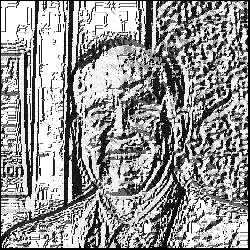

In [ ]:
cv2_imshow(img)

Gary_Bettman


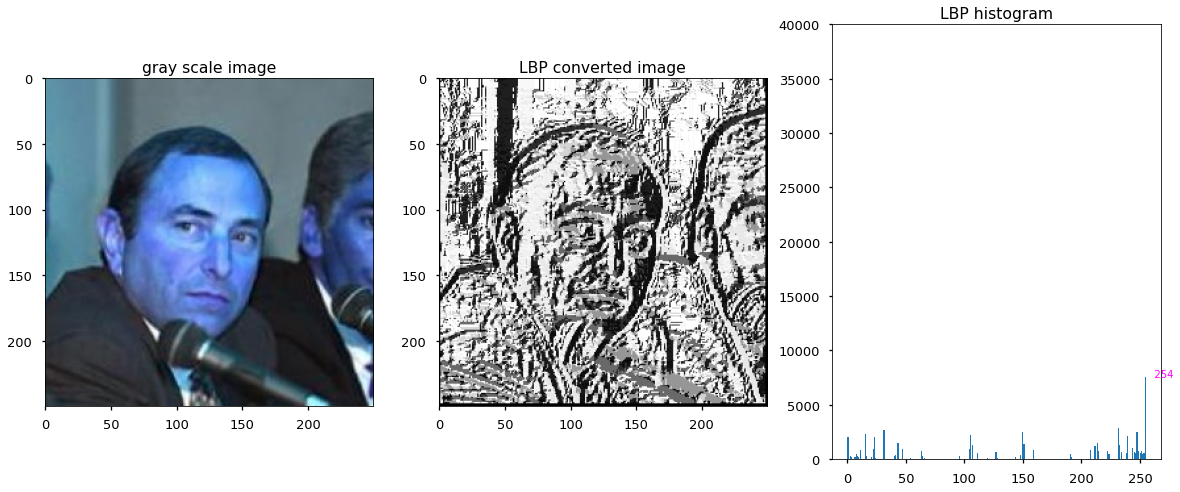

In [ ]:
dir_images = "/content/lfw"
imgs = os.listdir(dir_images)
for folder in os.listdir(dir_images):
  print(folder)
  path = os.path.join(dir_images, folder)
  for img in os.listdir(path):
    img_path = cv2.imread(os.path.join(path, img))
    imgLBP    = getLBPimage(img_path)
    vecimgLBP = imgLBP.flatten()

    fig = plt.figure(figsize=(20,8))
    ax  = fig.add_subplot(1,3,1)
    ax.imshow(img_path)
    ax.set_title("gray scale image")
    ax  = fig.add_subplot(1,3,2)
    ax.imshow(imgLBP,cmap="gray")
    ax.set_title("LBP converted image")
    ax  = fig.add_subplot(1,3,3)
    freq,lbp, _ = ax.hist(vecimgLBP,bins=2**8)
    ax.set_ylim(0,40000)
    lbp = lbp[:-1]
    ## print the LBP values when frequencies are high
    largeTF = freq > 5000
    for x, fr in zip(lbp[largeTF],freq[largeTF]):
        ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
    ax.set_title("LBP histogram")
    plt.show()
  break

In [ ]:
def calc_hist(path):
 
      img_path = cv2.imread(path)
      imgLBP    = getLBPimage(img_path)
      vecimgLBP = imgLBP.flatten()

      hist = cv2.calcHist([imgLBP], [0], None, [256], [0, 256])
    
      return hist

In [ ]:
def eucledean_dist_hist(hist1, hist2):
  sum = 0
  for i in range (0,256):
    sum = sum + (hist1[i][0]-hist2[i][0])**2
  dist = math.sqrt(sum)
  print('euclidean distance:', dist)



In [ ]:
hist1 = calc_hist('/content/lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg')
hist2 = calc_hist('/content/lfw/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg')

In [ ]:
eucledean_dist_hist(hist1, hist2)

euclidean distance: 4350.073562596384
